# <u><center>Exploring Lego Sets<center></u>

# <center> Business Understanding <center>

<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

##  <center> DATA DICTIONARY <center> 
   
| <b>Variables | Defined Variables| Data Types|Unique Values| Missing Values| Length |  Description <b>|
| :- | :- | :- | :-: | :-: | :-: | :- |
| <b>Dataset 1 - Lego Set<b> |
| set_num | A code that is unique to each set in the dataset. | Object | 0 | 153| 11833 | This column is critical, and a missing value indicates the set is a duplicate or invalid! |
| name | A name for every set in the dataset. | Object | 10512 | 153 | 11833 | This can be the same for different sets |
| year | The date the set was released. |Integer/ <b>*DateTime*</b> | 66 | 0 | 11986 | Active sets from the years 1950 to 2017. |
| num_parts | The number of parts contained in the set. | Float | 0 | 5060 | 6926 | This column is not central to our analyses, so missing values are acceptable. |  
| theme_name |The name of the sub-theme of the set. | Object | 390 | 153 | 11833 |A sub theme to the name of every set in the dataset. |
| parent_theme | The name of the parent theme the set belongs to | Object | 109 | 0 | 11986 | Matches the `name` column of the `parent_themes` csv file. |
| <b>Dataset 2 - Parent Themes<b>|
| id | A code that is unique to every theme. | Integer | 111 | 0| 111 |  |
| name | The name of the parent theme.| Object| 111 | 0 |111|  Matches the `name` column of the `parent_themes` csv file. |
| is_licensed | Specifying whether the theme is a licensed theme | Boolean | 2 | 0 | 111 | True or False, whether it is licensed or not. |
| <b>Dataset 3 - Sets<b>|
| set_num | A code that is unique to each set in the dataset. | Object | 0 | 0| 11833 | This column is critical.|
| name | A name for every set in the dataset. | Object | 0 | 0 | 11833 |  |
| year | The date the set was released. | Integer | 0 | 0 | 11833 | Active sets from the years 1950 to 2017. |
| theme_id | A unique ID code of the theme used for the set. | Object | 0 | 0 | 11833 |From themes.csv. |
| num_parts | The number of parts contained in the set. | Float | 0 | 0 | 11833 | This column is not central to our analyses, so missing values are acceptable. |  
| <b>Dataset 4 - Themes<b>|
| theme_id | A unique ID code of the theme used for the set. | Integer | 0 | 0 | 614 |From themes.csv. |
| name | The name of theme.| Object| 0 | 0 |614|  Matches the `name` column of the `parent_themes` csv file. |
| parent_id | A code that is unique to every theme. | Float | 111 | 0| 503 |  |
| <b>Dataset 5 - Colors<b>|
| id | A code that is unique to every theme. | Integer | 111 | 0| 215 |  |
| name | Name of colour.| Object| 111 | 0 |215|  The name of the colour. |
| rgb | Colour Code | Object | 2 | 0 | 215 | True or False, whether it is licensed or not. |
| is_trans | Where a colour is transparent or not | Object | 2 | 0 | 215 | t or f, whether it is transparent or not. |

 The column year data type is changed to datetime using pandas. Will be questioned further on.

In [2]:
# Importing necessary modules, pandas and numpy

import pandas as pd
import numpy as np

import datetime
import matplotlib
import matplotlib.pyplot as plt


# Defining dataframes
df_ls = pd.read_csv("datasets/lego_sets.csv")
df_s = pd.read_csv("datasets/sets.csv")
df_pt = pd.read_csv("datasets/parent_themes.csv")
df_t = pd.read_csv("datasets/themes.csv")
df_c = pd.read_csv("datasets/colors.csv")


In [3]:
# The first five rows of the dataframe lego sets
df_ls.head()
#df_s.head()
# df_pt.head()
# df_t.head()
#df_c.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [4]:
# The lego sets columns data types
df_ls.dtypes
#df_s.dtypes
# df_pt.dtypes
# df_t.dtypes
#df_c.dtypes

set_num          object
name             object
year              int64
num_parts       float64
theme_name       object
parent_theme     object
dtype: object

In [5]:
# Detailed information on the lego sets dataframe 
df_ls.info()
#df_s.info()
# df_pt.info()
#df_t.info()
#df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [6]:
# Missing values from each dataset
df_ls.isnull().sum()
#df_s.isnull().sum()
# df_pt.isnull().sum()
#df_t.isnull().sum()
#df_c.isnull().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

#  <center> Reading Data <center> 

To get a simple understanding of data we look as the basic information so that you the reader can get a feel of the data before actually undertaking heavy data analysis.

#  LEGO SETS 

Looking into the columns dataset of Lego Sets

## Name of sets

In [7]:
df_ls['name'].count()

11833

In [8]:
df_ls['name'].value_counts().head() #There are 10512 different sets, some occuring more often than others

Basic Building Set        55
Universal Building Set    32
Basic Set                 23
Helicopter                23
Tow Truck                 14
Name: name, dtype: int64

## Year

In [9]:
df_ls['year'].min()

1950

In [10]:
df_ls['year'].max()

2017

In [11]:
df_ls['year'].value_counts().head()

2014    732
2015    680
2016    634
2012    625
2013    608
Name: year, dtype: int64

## Number of Parts

<b>Unnecessary to project but still part of the dataset!<b> Could potentially feature engineer, if not we will delete this column!<b>

In [12]:
df_ls['num_parts'].head()

0    471.0
1      NaN
2      NaN
3     12.0
4     12.0
Name: num_parts, dtype: float64

<i>Evidently there is a large amount of missing NaN values present. We can investigate in data cleaning.<i>

In [13]:
df_ls.isnull().sum() 

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

There is over 5060 missing values in this column. Which is not good for the practise of analysing data!

## Sub theme of name

In [14]:
df_ls['theme_name'].value_counts().head()

Supplemental    497
Technic         439
City            296
Friends         285
Duplo           260
Name: theme_name, dtype: int64

There are <b>390 different sub themes of sets <b>
Some occuring a lot more often than others.

## Parent theme belonging with set

In [15]:
df_ls['parent_theme'].value_counts().head()

Town             1116
Seasonal          928
Star Wars         609
Technic           536
Service Packs     456
Name: parent_theme, dtype: int64

# <center> DATA CLEANING <center>

In [42]:
pd.set_option('display.max_rows', None) # view whole dataset

s_pt = pd.merge(df_ls,df_pt,left_on='parent_theme',right_on='name') #s_pt merging two datasets together

s_pt.tail()


,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,Ben 10,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,Ben 10,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,Ben 10,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,Ben 10,True
11985,8519-1,Big Chill,2010,20.0,Ben 10,Ben 10,270,Ben 10,True


In [32]:
s_pt=s_pt.drop('num_parts',axis=1)

#Dropping the unnecessary columns of num_parts as it is irrelevant and has too many missing values


s_pt=s_pt[s_pt["set_num"].notna()]

#Removing the rows where set number is NaN

# <center>EXPLORATORY DATA ANALYSIS: EDA<center>

Provide some EDA on licensed sets such as Star Wars, Super Heroes, and Harry Potter, to get a better understanding of some of the well known famous movie brands used as lego sets. 

<b> How many in total Star War sets are licensed? <b>

In [19]:
df_StarWars = s_pt.where(s_pt['parent_theme'] == 'Star Wars') # filters to only star wars 

StarWars_is_licensed = df_StarWars['is_licensed'].value_counts() # counts the licensed star wars sets

StarWars_is_licensed = int(StarWars_is_licensed) # turns into an integer

print('Total Licensed Star Wars Themes: {}'.format(StarWars_is_licensed))

Total Licensed Star Wars Themes: 609


<b> How many in total Super Heroes sets are licensed? <b>

In [20]:
df_Super_Heroes = s_pt.where(s_pt['parent_theme'] == 'Super Heroes') # filters to only super heroes 

Super_Heroes_is_licensed = df_Super_Heroes['is_licensed'].value_counts() # counts the licensed super heroes sets

Super_Heroes_is_licensed = int(Super_Heroes_is_licensed) # turns into an integer

print('Total Licensed Super Heroes Themes: {}'.format(Super_Heroes_is_licensed))

Total Licensed Super Heroes Themes: 242


<b> In what year is the highest amount of Harry potter licensed sets? <b>

Text(0.5, 1.0, 'Harry Potter Licensed Sets per Year')

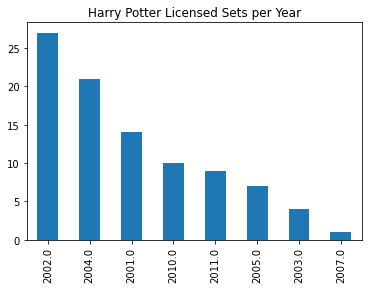

In [20]:
a = df_ls.where(df_ls['parent_theme'] == 'Harry Potter') # filters to only harry potter

harry_potter = a.groupby(['year','parent_theme'])['parent_theme'].value_counts() # groups year and harry potter

harry_potter = a['year'].value_counts() # this counts the amount of harry potter sets in each year

harry_potter.plot.bar() #Bar chart plot

plt.title('Harry Potter Licensed Sets per Year')

# <center>DATA ANALYSIS: Questions<center>

<b><center> 1. What percentage of all licensed sets ever released were Star Wars themed? Save your answer as a variable the_force in the form of an integer (e.g. 25)? <center> <b>

In [33]:
s_pt_islicensed = s_pt[s_pt['is_licensed'] == 1] # conditional filtering for only licensed sets

In [34]:
licensed_per = round(pd.DataFrame(s_pt_islicensed['parent_theme'].value_counts(normalize=True) * 100),2)
#a new dataframe with calculated percentages
    
licensed_per #calculating percentage of parent_themes

,parent_theme
Star Wars,51.65
Super Heroes,20.53
Harry Potter,5.68
The Hobbit and Lord of the Rings,3.39
Minecraft,2.54
Disney Princess,2.46
Cars,2.29
Teenage Mutant Ninja Turtles,1.78
Indiana Jones,1.61
Pirates of the Caribbean,1.44


In [35]:
star_wars_per = licensed_per.iloc[0]['parent_theme'] # Grabbing first index 

the_force = star_wars_per.round(0).astype(int) # Making it an integer and rounding to 0 decimal places 

the_force # final variable printed

print('Percentage of all Licensed Star Wars Themes: {}%'.format(the_force)) 

Percentage of all Licensed Star Wars Themes: 52%


# Tree Map for Licensed Themes

In [25]:
#TREE MAP
lic_list = [['Star Wars', 51.653944], 
          ['Super Heroes', 20.525869], 
          ['Harry Potter', 5.682782], 
          ['The Hobbit and LOTR', 3.392706],
          ['Minecraft', 2.544529],
          ['Disney Princess', 2.459712], 
          ['Cars', 2.290076], 
          ['TMNT', 1.781170], 
          ['Indiana Jones', 1.611535], 
          ['P0TC', 1.441900], 
          ['Toy Story', 1.272265], 
          ['SS', 1.187447], 
          ['The Lone Ranger', 0.678541], 
          ['Jurassic World', 0.593723], 
          ['Scooby-Doo', 0.508906], 
          ['Disneys Mickey Mouse', 0.508906], 
          ['Prince of Persia', 0.508906], 
          ['Angry Birds', 0.508906], 
          ['Ben 10', 0.508906], 
          ['Avatar', 0.169635], 
          ['Disney', 0.084818], 
          ['Ghostbusters', 0.084818]] # This is an array

lic_df = pd.DataFrame(lic_list, columns =['Parent_Theme', 'Percentage'])# Gives it a column header

Text(0.5, 1.0, 'Tree Map showing Themes')

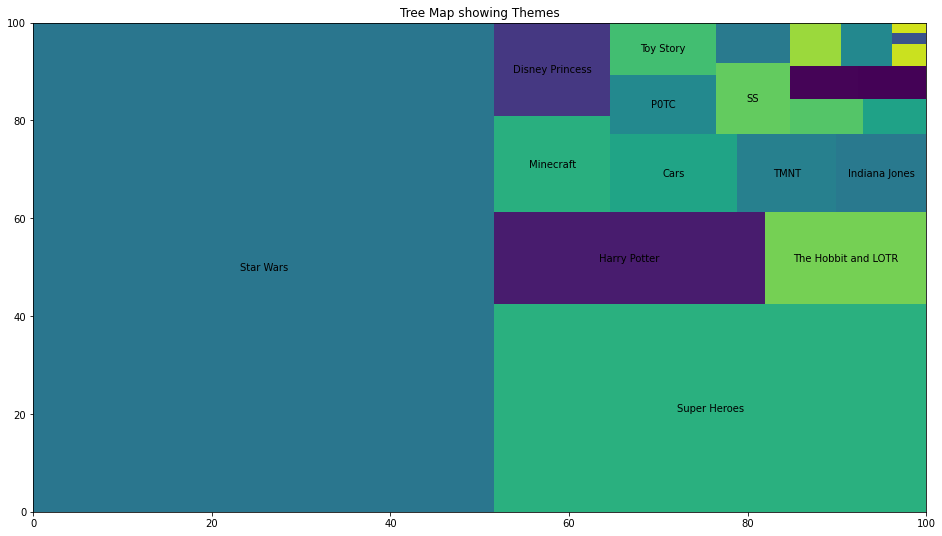

In [26]:
import squarify    # pip install squarify (algorithm for treemap)

norm = matplotlib.colors.Normalize(vmin=lic_df.Percentage.min(), vmax=lic_df.Percentage.max())  
#working percentage of each theme and giving a range
#Creates a matplotlib normalisier to scale the values along the data range


lic_df['color'] = lic_df.Percentage.apply(lambda x: matplotlib.cm.Reds(norm(x)))  
# changes colour
# passes the normalise values into a colour ramp and saves into a variable


#plotting tree map
fig = plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=lic_df.Percentage, 
    label=lic_df.apply(lambda x: x.Parent_Theme if x.Percentage > 1 else '', axis=1))
    # gets rid of any theme less than 1

    
plt.title('Tree Map showing Themes') #Adding Title  

<b><center> 2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? Save your answer as a variable new_era in the form of an integer (e.g. 2012) <center> <b>

In [27]:

# filter result by if licensed 
a = s_pt.where(s_pt['is_licensed'] == True)

#get the years
year = a['year'].unique()
year = year[1:]

print(year)

#find a count of occurences by category and year
answer = a.groupby(['year','parent_theme'])['parent_theme'].count()

[2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012.
 2013. 2016. 2014. 2015. 2017. 2000. 1999.]


In [28]:
new_era = []

#loop through years
for i in year:
    i2 = answer[i].idxmax() # get the item category

    if i2 != 'Star Wars': #check the highest category is start wars
        i = int(i)
        new_era = int(i)  #save as ordered date time integer
       
        

#print it
print('The year Star Wars was not the most popular licensed theme: {}!'.format(new_era))

The year Star Wars was not the most popular licensed theme: 2017!


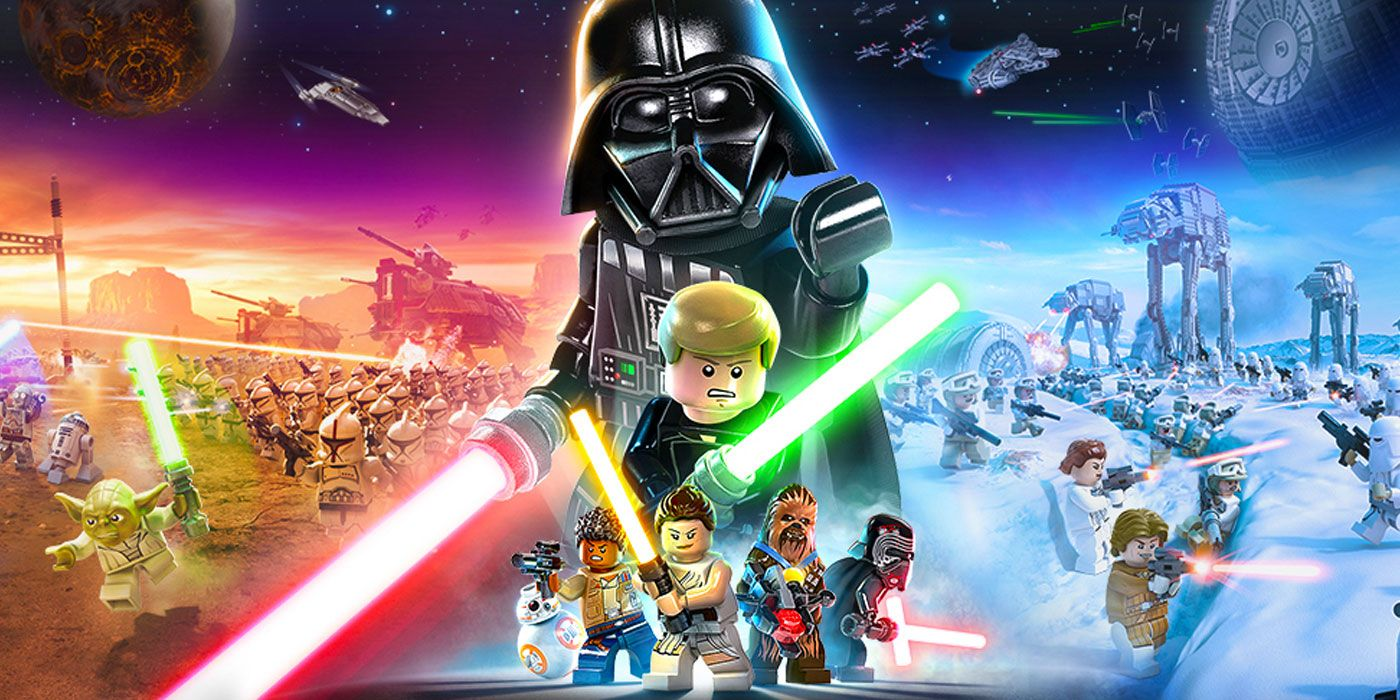

## <center> More EDA: Exploring Colors <center>
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [39]:
# Read colors data
colors = pd.read_csv("datasets/colors.csv")

# How many unique colors are there?
num_colors = len(colors.name.unique())
print(num_colors)

215


##  Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [40]:
colors['is_trans'].value_counts() # Counts the values of transparent or not transparent colours

f    177
t     38
Name: is_trans, dtype: int64

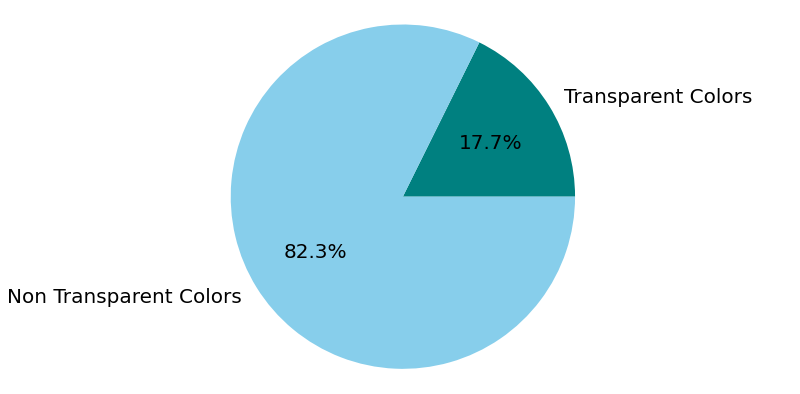

In [41]:
matplotlib.rcParams.update({'font.size': 20}) #alters parameters individually of labels, sizes, colors

# visualize transparent vs non transparent colors
transparent = colors['is_trans'] == 't'
non_transparent = colors['is_trans'] == 'f'

# data to plot
labels = 'Transparent Colors', 'Non Transparent Colors'
sizes = [transparent.sum(), non_transparent.sum()]
colors = ['teal', 'skyblue']

# Manipulating parameters
fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%',startangle=0) # decimal place for percentage, start angle is starting position of pie chart

plt.axis('equal')
plt.show() 

##  Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

<AxesSubplot:title={'center':'Number of Lego Parts in Sets Over Time'}, xlabel='year', ylabel='Number of Lego Parts'>

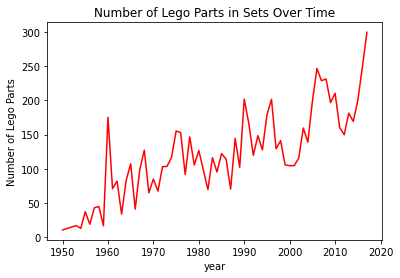

In [23]:
%matplotlib inline 
# plots in line

sets= pd.read_csv('datasets/sets.csv') # Read sets data

# Average number of parts by year: `s_year`

s_sets = sets.sort_values(by='year') # Sorts values in the year

s_year = s_sets.groupby('year')['num_parts'].aggregate('mean') #mean for year and num 


plt.title('Number of Lego Parts in Sets Over Time') # title of plot
plt.ylabel('Number of Lego Parts') # y axis label of plot

s_year.plot(color = 'Red') # the colour of the line 

##  Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

Text(0, 0.5, 'Number of Themes in Lego Sets')

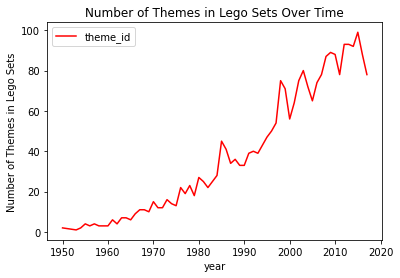

In [27]:
# Groups by year and placed in index

themes_year_df = sets.groupby('year', as_index=True).agg({'theme_id': pd.Series.nunique}) 
#counts unique theme ids by year

themes_year_df.plot(color = 'Red') #plotting the values

plt.title('Number of Themes in Lego Sets Over Time')  # title of plot
plt.ylabel('Number of Themes in Lego Sets')  # y label of plot

##  Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the <code>themes_by_year</code> DataFrame you created in the previous step.</p>

## <center> What would we do next in our project?<center>


<p>If we had three weeks to complete this project what would we do to improve or add to this project? </p>

* Get more granular (taking smaller subsets) 
* Find more datasets such as sold, price, geographical location, seasonal changes/holidays,etc.
* DateTime datatype for year 